## Loading Data for Zip codes in Bournemouth

In [2]:
import requests
import pandas as pd

In [3]:
!wget -O 'temp.zip' https://www.getthedata.com/downloads/open_postcode_geo.csv.zip

--2020-08-15 03:39:13--  https://www.getthedata.com/downloads/open_postcode_geo.csv.zip
Resolving www.getthedata.com (www.getthedata.com)... 95.154.195.188
Connecting to www.getthedata.com (www.getthedata.com)|95.154.195.188|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 64679638 (62M) [application/zip]
Saving to: ‘temp.zip’

temp.zip            100%[===================>]  61.68M  19.7MB/s    in 3.1s    

2020-08-15 03:39:16 (19.7 MB/s) - ‘temp.zip’ saved [64679638/64679638]



In [4]:
!unzip temp.zip
!rm temp.zip

Archive:  temp.zip
  inflating: open_postcode_geo.csv   
  inflating: readme.txt              
  inflating: licence.txt             


In [5]:
df1_zip = pd.read_csv('open_postcode_geo.csv', names=["postcode","status","usertype","easting","northing","positional_quality_indicator","country","latitude","longitude","postcode_no_space","postcode_fixed_width_seven","postcode_fixed_width_eight","postcode_area","postcode_district","postcode_sector","outcode","incode"])
#df1_zip.head()

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3072: DtypeWarning: Columns (3,4,7,8) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [6]:

df_bournemouth_active = df1_zip.loc[(df1_zip['status'] == 'live') & (df1_zip['country'] == 'England') & (df1_zip['postcode_area']=='BH')]
#[[df1_zip['status'] == 'live'] && [df1_zip['country'] == 'England']

In [7]:

df_bournemouth_active.head()

,postcode,status,usertype,easting,northing,positional_quality_indicator,country,latitude,longitude,postcode_no_space,postcode_fixed_width_seven,postcode_fixed_width_eight,postcode_area,postcode_district,postcode_sector,outcode,incode
173456,BH1 1AA,live,large,409722,92041,1,England,50.727909,-1.863623,BH11AA,BH1 1AA,BH1 1AA,BH,BH1,BH1 1,BH1,1AA
173458,BH1 1AF,live,small,409181,91523,1,England,50.723260,-1.871300,BH11AF,BH1 1AF,BH1 1AF,BH,BH1,BH1 1,BH1,1AF
173460,BH1 1AH,live,small,409265,91464,1,England,50.722728,-1.870112,BH11AH,BH1 1AH,BH1 1AH,BH,BH1,BH1 1,BH1,1AH
173461,BH1 1AJ,live,small,409162,92265,1,England,50.729932,-1.871551,BH11AJ,BH1 1AJ,BH1 1AJ,BH,BH1,BH1 1,BH1,1AJ
173462,BH1 1AL,live,small,409284,91366,1,England,50.721846,-1.869845,BH11AL,BH1 1AL,BH1 1AL,BH,BH1,BH1 1,BH1,1AL


/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


<AxesSubplot:title={'center':'Count of Properties by ZipCode'}, xlabel='ZipCode,outcode'>

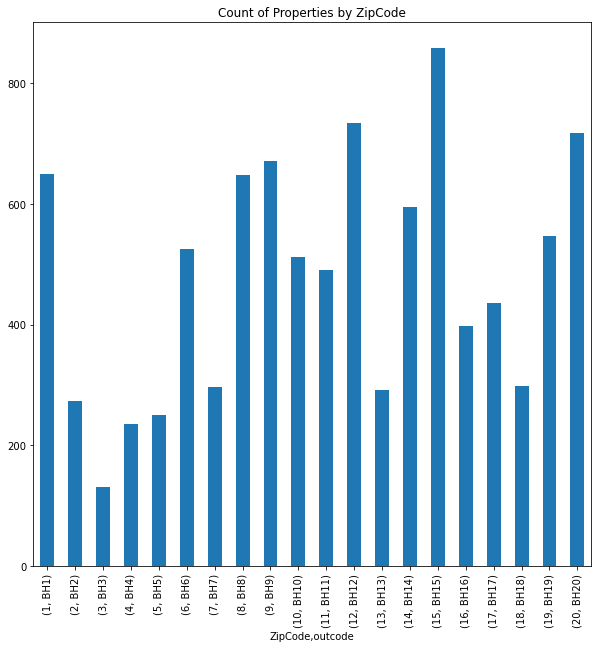

In [8]:
Search_for_These_values = ['BH21','BH22','BH23','BH24','BH25','BH26','BH25','BH26','BH27','BH28','BH29','BH30','BH31'] 

pattern = '|'.join(Search_for_These_values)

hist_df = df_bournemouth_active 

hist_df['ZipCode'] = hist_df.outcode.str[2:].astype(int)

hist_df=hist_df.sort_values(by='ZipCode')


hist_df.reindex()


hist_df[~hist_df.outcode.str.contains(pattern)].groupby(['ZipCode','outcode'])['postcode'].count().plot(kind='bar',title="Count of Properties by ZipCode",figsize =(10,10))

In [9]:
df_bournemouth_active[["latitude", "longitude"]] = df_bournemouth_active[["latitude", "longitude"]].apply(pd.to_numeric)

df_bournemouth_active.dtypes

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/pandas/core/frame.py:2963: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


postcode                         object
status                           object
usertype                         object
easting                          object
northing                         object
positional_quality_indicator      int64
country                          object
latitude                        float64
longitude                       float64
postcode_no_space                object
postcode_fixed_width_seven       object
postcode_fixed_width_eight       object
postcode_area                    object
postcode_district                object
postcode_sector                  object
outcode                          object
incode                           object
ZipCode                           int64
dtype: object

In [10]:
df_zip_group = df_bournemouth_active.groupby('outcode')['latitude','longitude'].mean()
df_zip_group = df_zip_group.drop(['BH20','BH21','BH22','BH23','BH24','BH25','BH31'])

df_zip_group

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,latitude,longitude
outcode,,
BH1,50.724880,-1.860945
BH10,50.759580,-1.892942
BH11,50.762156,-1.919619
BH12,50.737346,-1.927792
BH13,50.708816,-1.920506
BH14,50.721365,-1.944496
BH15,50.722373,-1.984971
BH16,50.740172,-2.047393
BH17,50.746884,-1.980080


In [11]:
df_zip_group.reset_index(inplace=True)

#df_zip_group

In [12]:
df_zip_group.columns = ['Postal Code','Latitude', 'Longitude']

In [36]:
df_zip_group['House Price Detached'] = 0.0
df_zip_group['House Price Flats'] = 0.0

df_zip_group[["House Price Detached", "House Price Flats"]] = df_zip_group[["House Price Detached", "House Price Flats"]].apply(pd.to_numeric)

df_zip_group

,Postal Code,Latitude,Longitude,House Price Detached,House Price Flats
0,BH1,50.724880,-1.860945,0.0,0.0
1,BH10,50.759580,-1.892942,0.0,0.0
2,BH11,50.762156,-1.919619,0.0,0.0
3,BH12,50.737346,-1.927792,0.0,0.0
4,BH13,50.708816,-1.920506,0.0,0.0
5,BH14,50.721365,-1.944496,0.0,0.0
6,BH15,50.722373,-1.984971,0.0,0.0
7,BH16,50.740172,-2.047393,0.0,0.0
8,BH17,50.746884,-1.980080,0.0,0.0
9,BH18,50.759541,-1.998476,0.0,0.0


In [26]:
pip install lxml

     |████████████████████████████████| 5.5MB 184kB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [38]:
#df_zip_group.head()



df_final = df_zip_group


#print('Before dropping Boroughs ='.join(df.shape))
#df_wikipedia= df[df['Borough'] != 'Not assigned'].reset_index(drop= True)

#there are no Postal codes repeated so we dont need to concatinate the Neighbourhoods.

#df_wikipedia.shape

#df_zip_group.dtypes
#df_final[["House Price Detached", "House Price Flats"]]
df_zip_group

,Postal Code,Latitude,Longitude,House Price Detached,House Price Flats
0,BH1,50.724880,-1.860945,0.0,0.0
1,BH10,50.759580,-1.892942,0.0,0.0
2,BH11,50.762156,-1.919619,0.0,0.0
3,BH12,50.737346,-1.927792,0.0,0.0
4,BH13,50.708816,-1.920506,0.0,0.0
5,BH14,50.721365,-1.944496,0.0,0.0
6,BH15,50.722373,-1.984971,0.0,0.0
7,BH16,50.740172,-2.047393,0.0,0.0
8,BH17,50.746884,-1.980080,0.0,0.0
9,BH18,50.759541,-1.998476,0.0,0.0


In [39]:

import requests
from pandas.io.json import json_normalize


fourSqAPIURL = "https://api.foursquare.com/v2/venues/explore"
CLIENT_ID ="OT1XN4STDNQCNEBFQ4AKE25Z3JBAWWVCI0JXPOFKCS1MTBVH"
CLIENT_SECRET= "ZY41DW24OLBGGCGZAXZSOIU54DDLGQQJEGFEEDX2EPZMAYJ3"

In [40]:
def fetch_venue_Details(postalcode,latitude,longitude,v_list):
    new_venue = {'Postal Code':postalcode,'Latitude':latitude, 'Longitude':longitude,'Type':[],'Name':[]}

    new_venue["Name"] = v_list["venue"]["name"]
    new_venue["Type"] = v_list["venue"]["categories"][0]['pluralName']
    

    new_venues = pd.DataFrame(new_venue, index =[0])
    
  
   # new_venues = new_venues.append(new_venue,ignore_index=True)
    #print('after--- '+ str(new_venues))
    return new_venues

In [41]:
all_venues= pd.DataFrame()


for ind in df_final.index:

   
    lat = str(df_final['Latitude'][ind])
    lng = str(df_final['Longitude'][ind])

    #print(str("\n"+ df_final['outcode'][ind])+ "+++++++++++"+ str(ind)+"\n")
 
    payload = {'client_id': CLIENT_ID, 'client_secret': CLIENT_SECRET, 'll': lat+','+lng , 'radius':1500, 'v':'20180323'}

    resp = requests.get(fourSqAPIURL,params=payload)

    data = resp.json()
    
  #  print(data)
    try:
        for items in data["response"]["groups"][0]["items"]:
           
            all_venues = all_venues.append(fetch_venue_Details(df_final['Postal Code'][ind],lat,lng,items))
            #print('reached')
            all_venues.head()
    except:
        print(str(df_final['outcode'][ind])+ "-----EMPTY------------")
        empty_venue = {'Postal Code':df_final['Postal Code'][ind],'Latitude':lat, 'Longitude':lng,'Type':[],'Name':[]}
        all_venues.append(pd.DataFrame(empty_venue))

In [42]:
all_venues = all_venues.reset_index(drop=True)


all_venues.head()

,Postal Code,Latitude,Longitude,Type,Name
0,BH1,50.72488014769239,-1.8609451969230835,Pizza Places,Bournemouth Pizza Co.
1,BH1,50.72488014769239,-1.8609451969230835,Italian Restaurants,La Piccola Italia
2,BH1,50.72488014769239,-1.8609451969230835,Beaches,Bournemouth Beach (Toft Zig Zag)
3,BH1,50.72488014769239,-1.8609451969230835,Pubs,Inferno
4,BH1,50.72488014769239,-1.8609451969230835,Indian Restaurants,Spice of Lahore


In [43]:
neighbourhood_analysis = pd.get_dummies(all_venues,prefix='',prefix_sep='',columns=['Type'])

In [44]:
mean_data = neighbourhood_analysis.set_index(['Postal Code'])
mean_data = mean_data.groupby(level='Postal Code').mean()

In [45]:
mean_data

,American Restaurants,Art Museums,Athletics & Sports,Bakeries,Bars,Beaches,Bed & Breakfasts,Beer Bars,Bistros,Bookstores,...,Tea Rooms,Tennis Stadiums,Thai Restaurants,Theaters,Train Stations,Turkish Restaurants,Vegetarian / Vegan Restaurants,Video Game Stores,Warehouse Stores,Women's Stores
Postal Code,,,,,,,,,,,,,,,,,,,,,
BH1,0.000000,0.033333,0.000000,0.000000,0.000000,0.066667,0.000000,0.000000,0.000000,0.000000,...,0.033333,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
BH10,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
BH11,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.066667,0.000000
BH12,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.045455,0.000000,0.000000,0.000000,0.000000,0.000000
BH13,0.000000,0.000000,0.000000,0.000000,0.000000,0.266667,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
BH14,0.000000,0.000000,0.000000,0.066667,0.166667,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.033333,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
BH15,0.000000,0.000000,0.000000,0.000000,0.033333,0.000000,0.000000,0.000000,0.000000,0.033333,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.033333,0.000000,0.033333
BH16,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
BH17,0.000000,0.000000,0.000000,0.045455,0.045455,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.045455,0.000000


For Segmenting we will segment into 4 distinct cluster

In [46]:
from sklearn.cluster import KMeans

#clusters
k=3

kmean_attractions = KMeans(n_clusters = k, random_state = 0, max_iter =500).fit(mean_data.to_numpy())
kmean_attractions.labels_

kmean_housing_prices = KMeans(n_clusters = k, random_state = 0, max_iter =500).fit(df_final[['House Price Detached','House Price Flats']].to_numpy())
kmean_housing_prices.labels_

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/cluster/k_means_.py:971: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (3). Possibly due to duplicate points in X.
  return_n_iter=True)


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
      dtype=int32)

In [47]:
mean_data['Attractions_Segment'] = kmean_attractions.labels_

data_analysis = mean_data.groupby('Attractions_Segment').mean()

data_analysis

,American Restaurants,Art Museums,Athletics & Sports,Bakeries,Bars,Beaches,Bed & Breakfasts,Beer Bars,Bistros,Bookstores,...,Tea Rooms,Tennis Stadiums,Thai Restaurants,Theaters,Train Stations,Turkish Restaurants,Vegetarian / Vegan Restaurants,Video Game Stores,Warehouse Stores,Women's Stores
Attractions_Segment,,,,,,,,,,,,,,,,,,,,,
0,0.005556,0.002778,0.002778,0.002778,0.025000,0.044872,0.003205,0.008333,0.003205,0.005556,...,0.002778,0.002778,0.013889,0.002778,0.003205,0.013889,0.005556,0.011111,0.000000,0.002778
1,0.000000,0.000000,0.000000,0.018687,0.040909,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.005556,0.000000,0.007576,0.000000,0.000000,0.000000,0.018687,0.000000
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [48]:

cols = list(data_analysis.columns)
indices = list(data_analysis.index)


for ind in indices:
    print ('\n\n----------------------------SEGMENT =' + str(ind)+'-------------------------------------------------------------------------------------------------------')
    for col in cols:
        if(data_analysis[col][ind]>0.040):
            print(str(col)+'='+str(data_analysis[col][ind]))



----------------------------SEGMENT =0-------------------------------------------------------------------------------------------------------
Beaches=0.04487179487179487
Cafés=0.06794871794871794
Coffee Shops=0.11553724053724053
Grocery Stores=0.040109890109890106
Parks=0.05912698412698412
Pubs=0.07472527472527472


----------------------------SEGMENT =1-------------------------------------------------------------------------------------------------------
Bars=0.0409090909090909
Fast Food Restaurants=0.04018759018759019
Furniture / Home Stores=0.050505050505050504
Grocery Stores=0.1784271284271284
Pharmacies=0.047258297258297256
Pizza Places=0.044949494949494954
Supermarkets=0.0831168831168831


----------------------------SEGMENT =2-------------------------------------------------------------------------------------------------------
Coffee Shops=0.2857142857142857
Golf Courses=0.14285714285714285
Grocery Stores=0.2857142857142857
Pizza Places=0.14285714285714285
Pubs=0.142857142857

In [49]:
mean_data['Housing_Segment'] = kmean_housing_prices.labels_

In [50]:
df_merged = pd.merge(df_final,mean_data[['Attractions_Segment','Housing_Segment']], how='left', on='Postal Code')

In [56]:

df_merged = pd.merge(df_merged,df_post_names,how='left',on='Postal Code')

NameError: name 'df_post_names' is not defined

In [52]:
df_merged

,Postal Code,Latitude,Longitude,House Price Detached,House Price Flats,Attractions_Segment,Housing_Segment
0,BH1,50.724880,-1.860945,0.0,0.0,0,0
1,BH10,50.759580,-1.892942,0.0,0.0,1,0
2,BH11,50.762156,-1.919619,0.0,0.0,1,0
3,BH12,50.737346,-1.927792,0.0,0.0,1,0
4,BH13,50.708816,-1.920506,0.0,0.0,0,0
5,BH14,50.721365,-1.944496,0.0,0.0,1,0
6,BH15,50.722373,-1.984971,0.0,0.0,0,0
7,BH16,50.740172,-2.047393,0.0,0.0,0,0
8,BH17,50.746884,-1.980080,0.0,0.0,1,0
9,BH18,50.759541,-1.998476,0.0,0.0,2,0
